In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:


# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))



608
608


In [3]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,tongchuan,,CN,,,,,,
1,hun,,LY,,,,,,
2,ampanihy,,MG,,,,,,
3,punta arenas,,CL,,,,,,
4,reconquista,,AR,,,,,,


In [4]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_keys
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found.Skipping...")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Tongchuanshi
Processing Weather Data for Record 2 of Set 1 | Hūn
Processing Weather Data for Record 3 of Set 1 | Ampanihy
Processing Weather Data for Record 4 of Set 1 | Punta Arenas
Processing Weather Data for Record 5 of Set 1 | Reconquista
Processing Weather Data for Record 6 of Set 1 | Nanortalik
Processing Weather Data for Record 7 of Set 1 | Lebu
Processing Weather Data for Record 8 of Set 1 | Khatanga
Processing Weather Data for Record 9 of Set 1 | Andenes
City not found.Skipping...
Processing Weather Data for Record 10 of Set 1 | Hambantota
Processing Weather Data for Record 11 of Set 1 | Mahébourg
Processing Weather Data for Record 12 of Set 1 | Visnes
Processing Weather Data for Record 13 of Set 1 | Rikitea
Processing Weather Data for Record 14 of Set 1 | Saskylakh
Processing Weather Data for Record 15 of Set 1 | Ushuaia
Processing Weather Data

Processing Weather Data for Record 34 of Set 3 | Fershampenuaz
Processing Weather Data for Record 35 of Set 3 | Kamaishi
Processing Weather Data for Record 36 of Set 3 | Kruisfontein
Processing Weather Data for Record 37 of Set 3 | Port Alfred
Processing Weather Data for Record 38 of Set 3 | Port Lincoln
Processing Weather Data for Record 39 of Set 3 | Fayetteville
Processing Weather Data for Record 40 of Set 3 | Labuhan
Processing Weather Data for Record 41 of Set 3 | Korla
Processing Weather Data for Record 42 of Set 3 | San Cristobal
Processing Weather Data for Record 43 of Set 3 | Urengoy
Processing Weather Data for Record 44 of Set 3 | Rajshahi
Processing Weather Data for Record 45 of Set 3 | Bethel
Processing Weather Data for Record 46 of Set 3 | Upernavik
Processing Weather Data for Record 47 of Set 3 | Aleksandrov Gay
Processing Weather Data for Record 48 of Set 3 | Bathsheba
Processing Weather Data for Record 49 of Set 3 | Santa Rosa
Processing Weather Data for Record 50 of Se

Processing Weather Data for Record 21 of Set 6 | Broome
Processing Weather Data for Record 22 of Set 6 | Sabha
Processing Weather Data for Record 23 of Set 6 | Huarmey
Processing Weather Data for Record 24 of Set 6 | Kashgar
Processing Weather Data for Record 25 of Set 6 | Bhānpurī
City not found.Skipping...
Processing Weather Data for Record 26 of Set 6 | Victoria
Processing Weather Data for Record 27 of Set 6 | Margate
Processing Weather Data for Record 28 of Set 6 | Hamilton
Processing Weather Data for Record 29 of Set 6 | Oddur
Processing Weather Data for Record 30 of Set 6 | Nome
Processing Weather Data for Record 31 of Set 6 | Forio
Processing Weather Data for Record 32 of Set 6 | Springdale
Processing Weather Data for Record 33 of Set 6 | Nabire
Processing Weather Data for Record 34 of Set 6 | Mayo
City not found.Skipping...
City not found.Skipping...
City not found.Skipping...
Processing Weather Data for Record 35 of Set 6 | Vardø
Processing Weather Data for Record 36 of Set 6 

Processing Weather Data for Record 4 of Set 9 | Belaya Gora
Processing Weather Data for Record 5 of Set 9 | Hay River
City not found.Skipping...
Processing Weather Data for Record 6 of Set 9 | Heraclea
Processing Weather Data for Record 7 of Set 9 | Ikwiriri
City not found.Skipping...
Processing Weather Data for Record 8 of Set 9 | Saint-Pierre
Processing Weather Data for Record 9 of Set 9 | Flin Flon
Processing Weather Data for Record 10 of Set 9 | College
Processing Weather Data for Record 11 of Set 9 | Baykit
City not found.Skipping...
City not found.Skipping...
Processing Weather Data for Record 12 of Set 9 | Phuket
Processing Weather Data for Record 13 of Set 9 | Lubango
Processing Weather Data for Record 14 of Set 9 | Beira
Processing Weather Data for Record 15 of Set 9 | Taywarah
Processing Weather Data for Record 16 of Set 9 | Ereymentau
Processing Weather Data for Record 17 of Set 9 | Paragominas
City not found.Skipping...
Processing Weather Data for Record 18 of Set 9 | Saint

Processing Weather Data for Record 35 of Set 11 | Saint-Augustin
Processing Weather Data for Record 36 of Set 11 | Olafsvik
Processing Weather Data for Record 37 of Set 11 | Bambanglipuro
Processing Weather Data for Record 38 of Set 11 | Verkhnyaya Toyma
Processing Weather Data for Record 39 of Set 11 | Hailun
Processing Weather Data for Record 40 of Set 11 | Alexandria
Processing Weather Data for Record 41 of Set 11 | Ano Mera
City not found.Skipping...
Processing Weather Data for Record 42 of Set 11 | Chul'man
Processing Weather Data for Record 43 of Set 11 | Mingshui

-----------------------------
Data Retrival Complete
-----------------------------


In [7]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("weather_data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,tongchuan,0,CN,1638485826,26,35.0806,109.0897,35.13,5.3
1,hun,100,LY,1638485827,33,29.1268,15.9477,65.41,13.73
2,ampanihy,2,MG,1638485828,60,-24.7,44.75,78.62,8.66
3,punta arenas,99,CL,1638485717,58,-53.15,-70.9167,53.62,19.19
4,reconquista,3,AR,1638485829,46,-29.15,-59.65,76.62,7.02


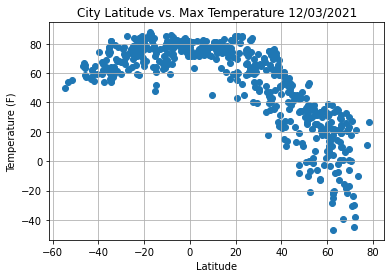

In [9]:


# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()



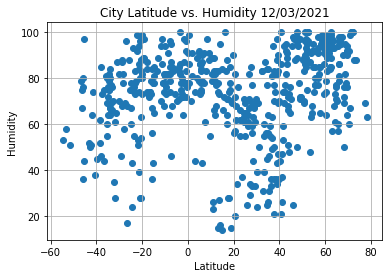

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

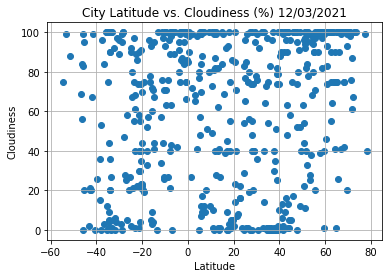

In [14]:


# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()



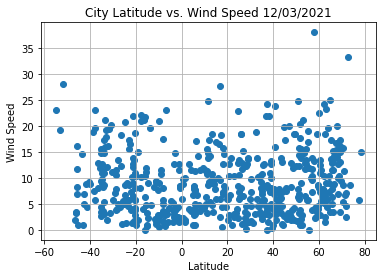

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Windspeed"]

city_weather = city_weather[new_column_order]

city_weather.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed
0,tongchuan,CN,1638485826,35.0806,109.0897,35.13,26,0,5.3
1,hun,LY,1638485827,29.1268,15.9477,65.41,33,100,13.73
2,ampanihy,MG,1638485828,-24.7,44.75,78.62,60,2,8.66
3,punta arenas,CL,1638485717,-53.15,-70.9167,53.62,58,99,19.19
4,reconquista,AR,1638485829,-29.15,-59.65,76.62,46,3,7.02
5,nanortalik,GL,1638485829,60.1432,-45.2371,25.52,74,46,22.53
6,lebu,CL,1638485640,-37.6167,-73.65,54.01,73,96,19.69
7,khatanga,RU,1638485555,71.9667,102.5,-37.98,100,67,7.2
8,andenes,NO,1638485831,69.3143,16.1194,30.18,64,99,16.11
10,hambantota,LK,1638485722,6.1241,81.1185,76.64,87,17,3.6


In [24]:
# Export the City_Data into a CSV.
city_weather.to_csv(output_data_file, index_label="City_ID")